In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Lendo o Dataset
DATA = "datasets/Mall_Customers.csv"

df = pd.read_csv(DATA, sep=',')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Selecionando as features
features = ["Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

# Transformando as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

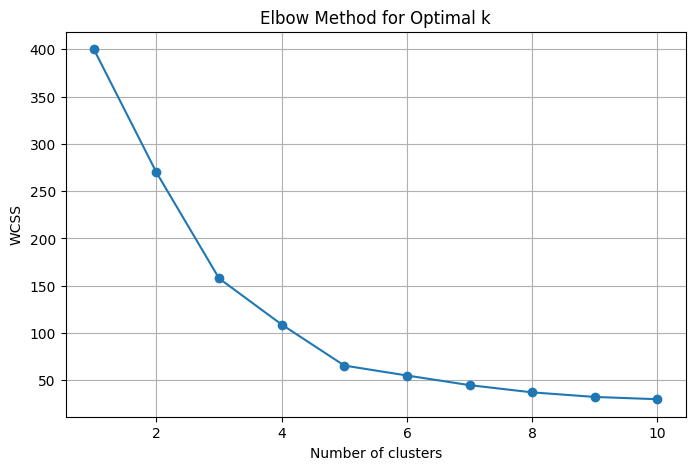

In [ ]:
# Aplicando o método do cotovelo para descubrir o k ideal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

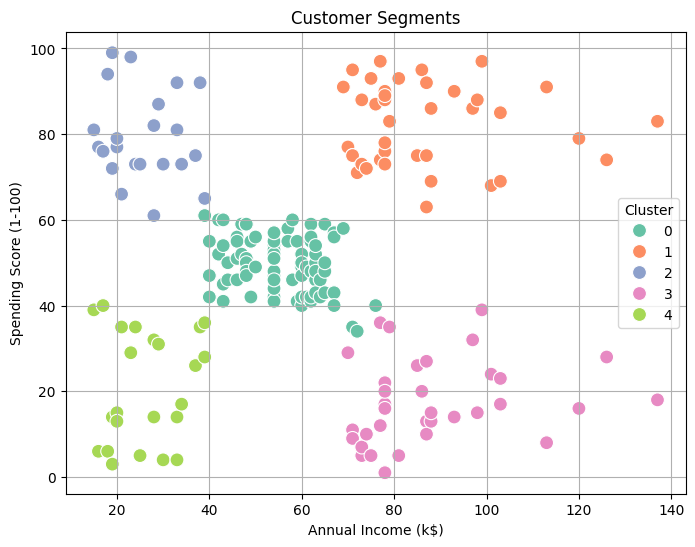

In [ ]:
# Aplicando o kmeans com k=5
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Adicionando os clusteres ao dataset para visualização
df['Cluster'] = clusters

# Visualização
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Annual Income (k$)", 
    y="Spending Score (1-100)", 
    hue="Cluster", 
    palette="Set2", 
    data=df, 
    s=100
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()